## Регрессия

### Задача 1

Обучите модель линейной регрессии для прогнозирования и введите указанные параметры. Для лучшего восприятия материала рекомендуем найти параметры модели самостоятельно (например, средствами MS Excel), подобно тому, как это было рассмотрено в лекции.

Определите выборочное среднее X 

Определите выборочное среднее Y

Найдите коэффициент Theta_0

Найдите коэффициент Theta_1

Оцените точность модели, вычислив R^2 статистику


In [1]:
import numpy as np

X = np.array([14, 21, 25, 8, 20, 18, 17, 3, 1, 10])
Y = np.array([36, 49, 72, 24, 56, 48, 51, 10, 3, 32])

mean_x = np.mean(X)
mean_y = np.mean(Y)

numerator = np.sum(X*Y) - len(X) * mean_x * mean_y
denominator = np.sum(X**2) - len(X) * mean_x**2
Theta_1 = numerator / denominator

Theta_0 = mean_y - Theta_1 * mean_x

y_pred = Theta_0 + Theta_1 * X
SSR = np.sum((Y - y_pred)**2)
SST = np.sum((Y - mean_y)**2)
R_squared = 1 - SSR/SST

print(f"Sample mean of X: {mean_x}")
print(f"Sample mean of Y: {mean_y}")
print(f"Theta_1 coefficient: {Theta_1}")
print(f"Theta_0 coefficient: {Theta_0}")
print(f"R^2 statistic: {R_squared}")

Sample mean of X: 13.7
Sample mean of Y: 38.1
Theta_1 coefficient: 2.638175144205557
Theta_0 coefficient: 1.9570005243838722
R^2 statistic: 0.9676535870007653


### Задача 2

Представленный набор данных — это набор данных о семи различных типах рыб, продаваемых в некоторой рыбной лавке. Цель заключается в том, чтобы предсказать массу рыбы по каким-то косвенным признакам, известным о рыбе. Сами признаки, быть может, нужно синтезировать из тех, что известны.

ВАЖНО: Задания с подробными пояснениями представлены в документе. Выполняя задания в Rapid Miner, следует вводить полученные ответы в соответствующие поля ввода ниже. Рекомендуем вводить ответы поэтапно, для этого специально предусмотрено достаточное количество попыток.

При помощи блока Split data разбейте набор данных на обучающую и тестовую выборки (доля тестовой части = 0.2) с параметром local random seed = 15. Используйте стратификацию по колонке Species. Стратификация позволит сохранить доли представленных объектов (по представителям типов рыб) в тренировочной и тестовой выборках.

Вычислите выборочное среднее колонки Width полученной тренировочной выборки.
Десятичный разделитель точка. Ответ округлите до тысячных.

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv('C:/Users/dima/Desktop/ITMO_PII/data/fish_train.csv')

df = pd.DataFrame(data)

train_df, test_df = train_test_split(df, test_size=0.2, random_state=15, stratify=df['Species'])

mean_width = train_df['Width'].mean()

print(f"The sample mean of the 'Width' column is: {mean_width:.3f}")


The sample mean of the 'Width' column is: 4.651


Построение базовой модели

Избавьтесь от категориальных признаков и обучите модель линейной регрессии (Linear Regression ) со следующими параметрами: feature selection = none, eliminate colinear features = False на тренировочном наборе данных. Выполните предсказания для тестового набора данных.
Оцените модель при помощи метрики squared correlation.

Введите squared correlation полученной модели.
Десятичный разделитель точка. Ответ округлите до тысячных.

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = df.drop(columns=['Species', 'Weight'])  
y = df['Weight']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=df['Species'])

model = LinearRegression()

model.fit(X_train, y_train)

predictions = model.predict(X_test)

squared_correlation = r2_score(y_test, predictions)**2

print(f"Squared correlation (R^2 score squared) is: {squared_correlation:.3f}")


Squared correlation (R^2 score squared) is: 0.620


Добавление предварительной обработки признаков.

Использование PCA.

Перечислите через запятую и пробел тройку отбрасываемых наиболее коррелированных признаков.
Например: Height, Width, Length3

In [4]:
import pandas as pd
import numpy as np

numerical_features = df.select_dtypes(include=[np.number]).drop(columns=['Weight'])

correlation_matrix = numerical_features.corr().abs()

upper_triangle = correlation_matrix.where(
    np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
)

sorted_pairs = upper_triangle.unstack().sort_values(ascending=False)

most_correlated_features = sorted_pairs.head(3).index.tolist()
features_to_remove = list({feature for pair in most_correlated_features for feature in pair})

print(f"Features to remove: {', '.join(features_to_remove)}")

Features to remove: Length1, Length2, Length3


Обучите модель PCA для трех наиболее коррелированных признаков. Введите долю объясненной дисперсии при использовании только первой главной компоненты.

Десятичный разделитель точка. Ответ округлите до тысячных.

In [5]:
from sklearn.decomposition import PCA

X_correlated_features = df[features_to_remove]

pca = PCA(n_components=1)

pca.fit(X_correlated_features)

explained_variance_ratio = pca.explained_variance_ratio_[0]

print(f"Explained variance ratio using the first principal component: {explained_variance_ratio:.3f}")


Explained variance ratio using the first principal component: 0.996


Замените тройку наиболее коррелированных признаков на полученный признак Lengths, значения которого совпадают со счетами первой главной компоненты. Обучите модель линейной регрессии. Введите squared correlation полученной модели.

Десятичный разделитель точка. Ответ округлите до тысячных.

In [6]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

correlated_features = ['Length2', 'Length3', 'Length1']  
X_correlated = df[correlated_features]
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_correlated)

df_reduced = df.drop(columns=correlated_features)
df_reduced['Lengths'] = X_pca[:, 0]

X = df_reduced.drop(columns=['Species', 'Weight'])
y = df_reduced['Weight']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=df['Species'])

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

squared_correlation = r2_score(y_test, predictions)**2

print(f"Squared correlation (R² score squared) is: {squared_correlation:.3f}")


Squared correlation (R² score squared) is: 0.588


Модификация признаков.

Используя полученный на предыдущем этапе набор данных, возведите в куб значения признаков Width, Height, Lengths. Введите выборочное среднее колонки Width тренировочного набора данных после возведения в куб.

Десятичный разделитель точка. Ответ округлите до тысячных.

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split

df_reduced['Width'] = df_reduced['Width'] ** 3
df_reduced['Height'] = df_reduced['Height'] ** 3 
df_reduced['Lengths'] = df_reduced['Lengths'] ** 3

X = df_reduced.drop(columns=['Species', 'Weight'])
y = df_reduced['Weight']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=df_reduced['Species'])

mean_width_cubed = X_train['Width'].mean()

print(f"Sample mean of the 'Width' column after cubing is: {mean_width_cubed:.3f}")


Sample mean of the 'Width' column after cubing is: 139.091


Введите номер изображения, соответствующего зависимости Weight от Width после преобразования.

Введите число 1 или 2.

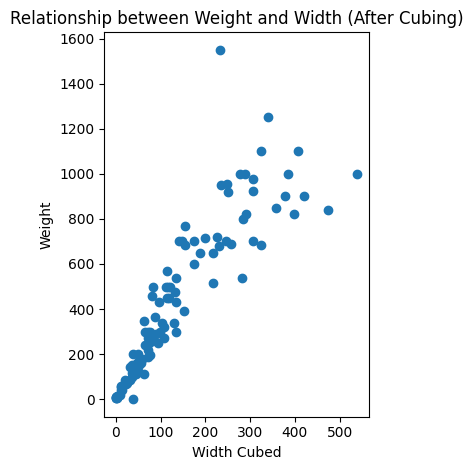

In [8]:
import matplotlib.pyplot as plt

plt.subplot(1, 2, 2)  
plt.scatter(df_reduced['Width'], df_reduced['Weight'])
plt.title('Relationship between Weight and Width (After Cubing)')
plt.xlabel('Width Cubed')
plt.ylabel('Weight')

# Show the plots
plt.tight_layout()
plt.show()

Обучите модель линейной регрессии. Введите значение squared correlation.

Десятичный разделитель точка. Ответ округлите до тысячных.

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

squared_correlation = r2_score(y_test, y_pred) ** 2

print(f"Squared correlation (R² score squared) is: {squared_correlation:.3f}")

Squared correlation (R² score squared) is: 0.836


Добавление категориальных признаков.

Добавьте к набору данных, полученному на предыдущем этапе, ранее исключенные категориальные признаки, предварительно закодировав их при помощи one-hot encoding. Обучите модель регрессии. Введите значение squared correlation.

Десятичный разделитель точка. Ответ округлите до тысячных.

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

species_one_hot = pd.get_dummies(df['Species'], prefix='Species')

df_combined = pd.concat([df_reduced.drop(columns=['Species']), species_one_hot], axis=1)

X = df_combined.drop(columns=['Weight'])
y = df_combined['Weight']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=df['Species'])

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

squared_correlation = r2_score(y_test, y_pred) ** 2

print(f"Squared correlation (R² score squared) is: {squared_correlation:.3f}")


Squared correlation (R² score squared) is: 0.870
